## Imports

In [1]:
import os
import time
import glob
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import boto3


## Reading data from S3

In [2]:

bucket = 'sagemaker-ap-south-1-748276930737'
subfolder = 'BBC News Summary/Summaries'
conn = boto3.client('s3')
contents = conn.list_objects(Bucket=bucket, Prefix=subfolder)['Contents']
for f in contents:
    print(f['Key'])

BBC News Summary/Summaries/business/001.txt
BBC News Summary/Summaries/business/002.txt
BBC News Summary/Summaries/business/003.txt
BBC News Summary/Summaries/business/004.txt
BBC News Summary/Summaries/business/005.txt
BBC News Summary/Summaries/business/006.txt
BBC News Summary/Summaries/business/007.txt
BBC News Summary/Summaries/business/008.txt
BBC News Summary/Summaries/business/009.txt
BBC News Summary/Summaries/business/010.txt
BBC News Summary/Summaries/business/011.txt
BBC News Summary/Summaries/business/012.txt
BBC News Summary/Summaries/business/013.txt
BBC News Summary/Summaries/business/014.txt
BBC News Summary/Summaries/business/015.txt
BBC News Summary/Summaries/business/016.txt
BBC News Summary/Summaries/business/017.txt
BBC News Summary/Summaries/business/018.txt
BBC News Summary/Summaries/business/019.txt
BBC News Summary/Summaries/business/020.txt
BBC News Summary/Summaries/business/021.txt
BBC News Summary/Summaries/business/022.txt
BBC News Summary/Summaries/busin

## EDA

In [3]:
#dump ZIP file i.e bbc summary data to jupyter notebook and read it 
articles_path = './BBC News Summary/News Articles'
summaries_path ='./BBC News Summary/Summaries'
categories_list = ['politics', 'sport', 'tech', 'entertainment', 'business']

In [4]:
#data into summary and text format
def read_files_from_folders(articles_path,summaries_path,categories_list, encoding = "ISO-8859-1"):
    articles = []
    summaries = []
    categories = []
    for category in categories_list:
        article_paths =  glob.glob(os.path.join(articles_path , category , '*.txt'), recursive=True)
        summary_paths =  glob.glob(os.path.join(summaries_path , category , '*.txt'), recursive=True)

        print(f'found {len(article_paths)} file in articles/{category} folder, {len(summary_paths)} file in summaries/{category} folder')

        if len(article_paths) != len(summary_paths):
            print('number of files is not equal') 
            return    
        for idx_file in range(len(article_paths)):
            categories.append(category)
            with open(article_paths[idx_file], mode = 'r', encoding = encoding) as file:
                articles.append(file.read())


            with open(summary_paths[idx_file], mode = 'r', encoding = encoding) as file:
                 summaries.append(file.read())
    
    print(f'total {len(articles)} file in articles folders, {len(summaries)} file in summaries folders')
    return articles, summaries, categories

In [5]:
#files in articles and summary 
articles, summaries, categories = read_files_from_folders(articles_path, summaries_path, categories_list)

found 417 file in articles/politics folder, 417 file in summaries/politics folder
found 511 file in articles/sport folder, 511 file in summaries/sport folder
found 401 file in articles/tech folder, 401 file in summaries/tech folder
found 386 file in articles/entertainment folder, 386 file in summaries/entertainment folder
found 510 file in articles/business folder, 510 file in summaries/business folder
total 2225 file in articles folders, 2225 file in summaries folders


In [6]:
#glacing at articles
test_file = './BBC News Summary/News Articles/business/008.txt'
with open(test_file, mode = 'r', encoding = "ISO-8859-1") as file:
    print(file.read())

India calls for fair trade rules

India, which attends the G7 meeting of seven leading industrialised nations on Friday, is unlikely to be cowed by its newcomer status.

In London on Thursday ahead of the meeting, India's finance minister, lashed out at the restrictive trade policies of the G7 nations. He objected to subsidies on agriculture that make it hard for developing nations like India to compete. He also called for reform of the United Nations, the World Bank and the IMF.

Palaniappan Chidambaram, India's finance minister, argued that these organisations need to take into account the changing world order, given India and China's integration into the global economy. He said the issue is not globalisation but "the terms of engagement in globalisation." Mr Chidambaram is attending the G7 meeting as part of the G20 group of nations, which account for two thirds of the world's population. At a conference on developing enterprise hosted by UK finance minister Gordon Brown on Friday, 

In [7]:
#all data into into a dataframe 
df = pd.DataFrame({'articles':articles,'summaries': summaries, 'categories' : categories},)
df

,articles,summaries,categories
0,Howard taunts Blair over splits\n\nTony Blair'...,It claims Mr Blair said in November 2003 he wo...,politics
1,Chancellor rallies Labour voters\n\nGordon Bro...,"He said Tory plans to cut Â£35bn tax would ""cu...",politics
2,Boothroyd calls for Lords speaker\n\nBetty Boo...,The lord chancellor currently has the role of ...,politics
3,Iraqis win death test case probe\n\nThe family...,They said as Mr Mousa was in custody when he d...,politics
4,'More to do' on adult literacy\n\nThe governme...,An estimated 5.2 million adults have worse lit...,politics
...,...,...,...
2220,Unilever shake up as profit slips\n\nAnglo-Dut...,The company also said it planned to spend 500m...,business
2221,Yukos seeks court action on sale\n\nYukos will...,Yukos will return to a US court on Wednesday t...,business
2222,Small firms 'hit by rising costs'\n\nRising fu...,A CBI quarterly survey found output had risen ...,business
2223,GM pays $2bn to evade Fiat buyout\n\nGeneral M...,"Instead, GM swapped a 6% stake in itself for 2...",business


In [8]:
#EDA on the dataframe 
df['articles_length'] = df['articles'].apply(lambda x : len(x.split()))
df['summaries_length'] = df['summaries'].apply(lambda x : len(x.split()))

In [9]:
df.head()

,articles,summaries,categories,articles_length,summaries_length
0,Howard taunts Blair over splits\n\nTony Blair'...,It claims Mr Blair said in November 2003 he wo...,politics,494,220
1,Chancellor rallies Labour voters\n\nGordon Bro...,"He said Tory plans to cut Â£35bn tax would ""cu...",politics,399,170
2,Boothroyd calls for Lords speaker\n\nBetty Boo...,The lord chancellor currently has the role of ...,politics,277,116
3,Iraqis win death test case probe\n\nThe family...,They said as Mr Mousa was in custody when he d...,politics,481,214
4,'More to do' on adult literacy\n\nThe governme...,An estimated 5.2 million adults have worse lit...,politics,495,209


In [10]:
category_length = df.groupby('categories',0).agg( {'articles_length':'mean', 'summaries_length':'mean'} )
category_length

,articles_length,summaries_length
categories,,
business,328.880392,139.929412
entertainment,330.621762,144.049223
politics,453.973621,195.709832
sport,329.262231,143.187867
tech,502.695761,213.837905


#### FINDINGS: stats for mean for summary and text length(mean)  categories wise

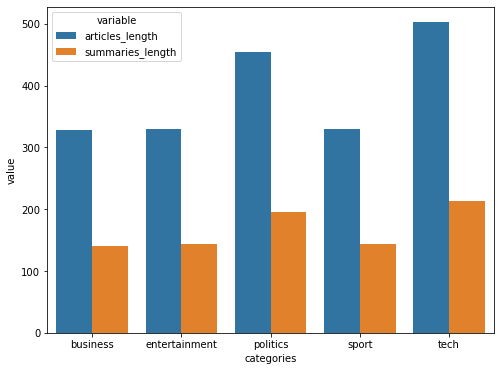

In [11]:
category_length = df.groupby('categories',0).agg( {'articles_length':'mean', 'summaries_length':'mean'} )
df_m = pd.melt(category_length,ignore_index=False)
plt.figure(figsize=(8,6))
sns.barplot(x=df_m.index, y="value",hue='variable', data= df_m)
plt.show()

In [12]:
pd.melt(category_length,ignore_index=False).groupby('variable').mean()

,value
variable,
articles_length,389.086753
summaries_length,167.342848


#### FINDINGS: stats for mean for summary and text length(mean)  

In [13]:
import numpy as np
import pandas as pd
#split df into train,val,test
def train_validate_test_split(df, train_percent=.8, validate_percent=.1, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [14]:
train, validate, test = train_validate_test_split(df)

In [15]:
train

,articles,summaries,categories,articles_length,summaries_length
1939,Pension hitch for long-living men\n\nMale life...,"""Even people in social class V [unskilled manu...",business,212,100
91,Brown's poll campaign move denied\n\nThe gover...,Labour has always maintained Mr Brown would ha...,politics,276,118
32,Vouchers 'to cut winter deaths'\n\nPensioners ...,"The plan would boost energy conservation, says...",politics,181,103
725,McIlroy continues winning streak\n\nJames McIl...,James McIlroy stormed to his second internatio...,sport,203,90
1841,Amex shares up on spin-off news\n\nShares in A...,The US credit card to travel services giant sa...,business,168,82
...,...,...,...,...,...
1838,BMW to recall faulty diesel cars\n\nBMW is to ...,BMW is to recall all cars equipped with a faul...,business,265,112
129,Parties' plans for council tax\n\nAnger at cou...,The Tories have promised a reduction on bills ...,politics,473,215
1317,Slow start to speedy net services\n\nFaster br...,"For BT Retail, she said, the super-fast servic...",tech,273,130
1888,Markets signal Brazilian recovery\n\nThe Brazi...,Investors have praised his handling of the eco...,business,382,164


In [ ]:
#dump data in usable format 
test.to_csv('test_bbc_news_data.csv')
validate.to_csv('val_bcc_news_data.csv')
train.to_csv('train_bcc_news_data.csv')

## Tranformers Training for Text Summarisation

In [16]:
#installation 
!pip install "sagemaker>=2.48.0" "transformers==4.6.1" "datasets[s3]==1.6.2" --upgrade
# install pytorch lib if not already installed 

  Using cached sagemaker-2.96.0.tar.gz (534 kB)
  Preparing metadata (setup.py) ... done
  Using cached sagemaker-2.95.0.tar.gz (530 kB)
  Preparing metadata (setup.py) ... done
  Using cached sagemaker-2.94.0.tar.gz (527 kB)
  Preparing metadata (setup.py) ... done
  Using cached sagemaker-2.93.1.tar.gz (527 kB)
  Preparing metadata (setup.py) ... done
  Using cached sagemaker-2.93.0.tar.gz (537 kB)
  Preparing metadata (setup.py) ... done
  Using cached sagemaker-2.92.2.tar.gz (537 kB)
  Preparing metadata (setup.py) ... done
  Using cached sagemaker-2.92.1.tar.gz (536 kB)
  Preparing metadata (setup.py) ... done
  Using cached sagemaker-2.92.0.tar.gz (536 kB)
  Preparing metadata (setup.py) ... done
  Using cached sagemaker-2.91.1.tar.gz (534 kB)
  Preparing metadata (setup.py) ... done
  Using cached sagemaker-2.91.0.tar.gz (534 kB)
  Preparing metadata (setup.py) ... done
  Using cached sagemaker-2.90.0.tar.gz (534 kB)
  Preparing metadata (setup.py) ... done
  Using cached sagema

In [17]:
#imports for huggingface
import transformers
import sagemaker
from sagemaker.huggingface import HuggingFace
from datasets import load_dataset
from transformers import AutoTokenizer


In [18]:
#setting up session,role and s3 bucket
sess = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sess.default_bucket()

print(f"IAM role arn used for running training: {role}")
print(f"S3 bucket used for storing artifacts: {sess.default_bucket()}")

IAM role arn used for running training: arn:aws:iam::748276930737:role/SagemakerNotebookGenericAccess
S3 bucket used for storing artifacts: sagemaker-ap-south-1-748276930737


In [19]:
#passing github repo
git_config = {'repo': 'https://github.com/huggingface/transformers.git','branch': 'v4.6.1'}

In [20]:
# enables spot training for cost saving 
use_spot_instances=True
# max time including spot start + training time
max_wait=7200
# expected training time
max_run=4000

distribution = {'smdistributed':{'dataparallel':{ 'enabled': False }}}

##### Training model using Hugging Face AWS Deep Learning Containers 
##### These containers include Hugging Face Transformers, Tokenizers and the Datasets library
##### Which allows us to use these resources for training and inference jobs

### Training First Transformer 
### Pegasus 

In [21]:
#local path in the hyperparameters section of the training job
hyperparameters={
     'train_file':'/opt/ml/input/data/train/train_bcc_news_data.csv',
     'validation_file':'/opt/ml/input/data/validation/val_bcc_news_data.csv',
     'summary_column':'summary',
     'text_column':'text',
     'per_device_train_batch_size': 2,
     'per_device_eval_batch_size': 2,
     'model_name_or_path':'google/pegasus-cnn_dailymail', # Pre-trained Pegasus model
     'do_train':True,
     'do_eval':True,
     'output_dir':'/opt/ml/model',
     'text_column': 'articles',
     'summary_column': 'summaries',
     'num_train_epochs': 6,
     'learning_rate': 5e-5,
     'seed': 7,
     'load_best_model_at_end':True,
     'max_source_length': 512,
     'report_to': 'wandb',    # ✍️
#      'run_name': 'hpt' 
     #'load_best_model_at_end':True
    # This is the maximum sequence length supported by Pegasus
 }

# create the Estimator
huggingface_estimator = HuggingFace(
    entry_point='run_summarization.py',
    source_dir='./examples/pytorch/summarization',
    git_config=git_config,
    instance_type='ml.g4dn.xlarge',
    instance_count=1,
    use_spot_instances=True,
    max_wait=3600,# max_wait should be equal to or greater than max_run in seconds
    max_run=1000,
    transformers_version='4.6',
    pytorch_version='1.7',
    py_version='py36',
    role=role,
    hyperparameters=hyperparameters,
    distribution=distribution,
)



In [ ]:
#When executing the fit() method on the training task,
#We specify where the data are located in Amazon S3.
huggingface_estimator.fit({'train':f's3://{bucket}/data_bbc/train_bcc_news_data.csv',
                           'validation':f's3://{bucket}/data_bbc/val_bcc_news_data.csv'})


### Evaluate the Pegasus Model

In [ ]:
# we have two options
# First is deploying model using sagemaker endpoint 
# Dowloading the trained model locally 
# 1)We choose first option as we can access model from s3 directly 
# 2)As we can choose a gpu instance for the endpoint we can decrease inference time significantly 

In [21]:
# specifying pegasus model training job  
training_job = 'huggingface-pytorch-training-2022-06-23-09-38-10-404'
#training_job = client.list_training_jobs()['TrainingJobSummaries'][0]['TrainingJobName']
model_data = sess.describe_training_job(training_job)['ModelArtifacts']['S3ModelArtifacts']
model_data

's3://sagemaker-ap-south-1-748276930737/huggingface-pytorch-training-2022-06-23-09-38-10-404/output/model.tar.gz'

### Deploy the Peagsus model

#### the model is deployed using estimator.deploy()

In [22]:
from datasets import load_metric
metric = load_metric("rouge")

In [23]:
from sagemaker.huggingface import HuggingFaceModel

model_for_deployment = HuggingFaceModel(entry_point='inference.py',
                                        source_dir='./text-summarisation-project/inference_code',
                                        model_data=model_data,
                                        role=role,
                                        pytorch_version='1.7.1',
                                        py_version='py36',
                                        transformers_version='4.6.1',
                                        )

In [24]:
predictor_pegasus = model_for_deployment.deploy(initial_instance_count=1,
                                        instance_type='ml.g4dn.xlarge',
                                        serializer=sagemaker.serializers.JSONSerializer(),
                                        deserializer=sagemaker.deserializers.JSONDeserializer()
                                        )

------!

In [25]:
# reading val data
df_test = pd.read_csv('test_bbc_news_data.csv')
ref_summaries = list(df_test['summaries'])
texts = list(df_test['articles'])

In [26]:
len(ref_summaries[0])

754

In [27]:
ref_summaries[0]

'LG Card had been threatened with collapse because of its huge debts but the firm\'s creditors and its former parent have stepped in to rescue it.South Korea\'s largest credit card firm has averted liquidation following a one trillion won ($960m; Â£499m) bail-out.The firm\'s creditors - which own 99% of LG Card - have been trying to agree a deal to secure its future for several weeks.LG Card returned to profit in September but needed further capital to avoid being thrown off the market.LG Card has seven million customers and its collapse would have sent shockwaves through the country\'s economy."LG Card will not need any more financial aid after this," Laah Chong-gyu, executive director of Korea Development Bank - one of the firm\'s creditors - said.'

In [28]:
texts[0]

'S Korean credit card firm rescued\n\nSouth Korea\'s largest credit card firm has averted liquidation following a one trillion won ($960m; Â£499m) bail-out.\n\nLG Card had been threatened with collapse because of its huge debts but the firm\'s creditors and its former parent have stepped in to rescue it. A consortium of creditors and LG Group, a family owned conglomerate, have each put up $480m to stabilise the firm. LG Card has seven million customers and its collapse would have sent shockwaves through the country\'s economy.\n\nThe firm\'s creditors - which own 99% of LG Card - have been trying to agree a deal to secure its future for several weeks. They took control of the company in January when it avoided bankruptcy only through a $4.5bn bail-out.\n\nThey had threatened to delist the company, a move which would have triggered massive debt redemptions and forced the company into bankruptcy, unless agreement was reached on its future funding. "LG Card will not need any more financia

#### No longer than 30 seconds read is max of 90 words
#### we will use min legth of 20 and max of 90 for making summaries as per bussiness requirement /

In [31]:
candidate_summaries_pegasus = []

for i, text in enumerate(texts):
    if i % 100 == 0:
        print(i)
    data = {"inputs":text, "parameters_list":[{"min_length": 20, "max_length": 90}]}
    candidate_pegasus = predictor_pegasus.predict(data)
    candidate_summaries_pegasus.append(candidate_pegasus[0][0])

0
100
200


In [32]:
def calc_rouge_scores(candidates, references):
    result = metric.compute(predictions=candidates, references=references, use_stemmer=True)
    print(result)
    result = {key: round(value.mid.fmeasure * 100, 1) for key, value in result.items()}
    return result

In [33]:
calc_rouge_scores(candidate_summaries_pegasus, ref_summaries)

{'rouge1': AggregateScore(low=Score(precision=0.9274717824339371, recall=0.4520188397206453, fmeasure=0.5859853828137624), mid=Score(precision=0.941329656135676, recall=0.4759011622409097, fmeasure=0.6082421666172781), high=Score(precision=0.9543440939763077, recall=0.49887533525010375, fmeasure=0.6278673680810242)), 'rouge2': AggregateScore(low=Score(precision=0.8716887673022384, recall=0.42386579290078014, fmeasure=0.5510705491611586), mid=Score(precision=0.8925678099065982, recall=0.4461116062690913, fmeasure=0.5719399299334966), high=Score(precision=0.9111752268248845, recall=0.4730880949771845, fmeasure=0.5953049122451453)), 'rougeL': AggregateScore(low=Score(precision=0.7397224353591033, recall=0.3615918312911822, fmeasure=0.46872105291297617), mid=Score(precision=0.7611237682591868, recall=0.38389110404648674, fmeasure=0.49050495942454564), high=Score(precision=0.7829786793287019, recall=0.4055873897871912, fmeasure=0.5104816821385586)), 'rougeLsum': AggregateScore(low=Score(pre

{'rouge1': 60.8, 'rouge2': 57.2, 'rougeL': 49.1, 'rougeLsum': 49.1}

In [ ]:
##findings from the first experiment i.e pegasus 

# the model is already trained on 

In [35]:
candidate_summaries_pegasus[48]

'There were fears that the potential increase of shares in circulation from Tuesday would ease demand for stock.Shares in Google have fallen 6.7% after employees and early investors in the web search took advantage of the first chance to sell their holdings.In its first earnings report since floating on the stock market, Google said it made a net profit of $52m in the three months ending 30 September.Google shares have risen since but fell $12.33 on Tuesday'

In [36]:
ref_summaries[48]

"Google shares have risen since but fell $12.33 on Tuesday to close at $172.55.There were fears that the potential increase of shares in circulation from Tuesday would ease demand for stock.In one of the most closely-watched initial public offerings in stock market history, the US-based company sold 19.6 million shares at $85 each.Selling the shares could turn many of Google's workers into millionaires.However, analysts say they expected most shareholders would be holding back from selling all their shares immediately, as Google's good performance and future growth potential means demand will hold."

### Training Second model 
#### T5

In [ ]:
#local path in the hyperparameters section of the training job
hyperparameters={
     'train_file':'/opt/ml/input/data/train/train_bcc_news_data.csv',
     'validation_file':'/opt/ml/input/data/validation/val_bcc_news_data.csv',
     'summary_column':'summary',
     'text_column':'text',
     'per_device_train_batch_size': 2,
     'per_device_eval_batch_size': 2,
     'model_name_or_path':'mrm8488/t5-base-finetuned-summarize-news', # Pre-trained Pegasus model
     'do_train':True,
     'do_eval':True,
     'output_dir':'/opt/ml/model',
     'text_column': 'articles',
     'summary_column': 'summaries',
     'num_train_epochs': 6,
     'learning_rate': 5e-5,
     'seed': 7,
     'load_best_model_at_end':True,
     'max_source_length': 512,
     'report_to': 'wandb',    # ✍️
#      'run_name': 'hpt' 
     #'load_best_model_at_end':True
    # This is the maximum sequence length supported by Pegasus
 }

# create the Estimator
huggingface_estimator = HuggingFace(
    entry_point='run_summarization.py',
    source_dir='./examples/pytorch/summarization',
    git_config=git_config,
    instance_type='ml.g4dn.xlarge',
    instance_count=1,
    use_spot_instances=True,
    max_wait=3600,# max_wait should be equal to or greater than max_run in seconds
    max_run=1000,
    transformers_version='4.6',
    pytorch_version='1.7',
    py_version='py36',
    role=role,
    hyperparameters=hyperparameters,
    distribution=distribution,
)



In [ ]:
#When executing the fit() method on the training task,
#We specify where the data are located in Amazon S3.
huggingface_estimator.fit({'train':f's3://{bucket}/data_bbc/train_bcc_news_data.csv',
                           'validation':f's3://{bucket}/data_bbc/val_bcc_news_data.csv'})


### Evaluating T5 model 

In [37]:
# specifying pegasus model training job  
training_job = 'huggingface-pytorch-training-2022-06-23-08-37-44-466'
#training_job = client.list_training_jobs()['TrainingJobSummaries'][0]['TrainingJobName']
model_data = sess.describe_training_job(training_job)['ModelArtifacts']['S3ModelArtifacts']
model_data

's3://sagemaker-ap-south-1-748276930737/huggingface-pytorch-training-2022-06-23-08-37-44-466/output/model.tar.gz'

### Deploy the T5 model

#### the model is deployed using estimator.deploy()

In [38]:
from datasets import load_metric
metric = load_metric("rouge")

In [39]:
from sagemaker.huggingface import HuggingFaceModel

model_for_deployment = HuggingFaceModel(entry_point='inference.py',
                                        source_dir='./text-summarisation-project/inference_code',
                                        model_data=model_data,
                                        role=role,
                                        pytorch_version='1.7.1',
                                        py_version='py36',
                                        transformers_version='4.6.1',
                                        )

predictor_t5 = model_for_deployment.deploy(initial_instance_count=1,
                                        instance_type='ml.g4dn.xlarge',
                                        serializer=sagemaker.serializers.JSONSerializer(),
                                        deserializer=sagemaker.deserializers.JSONDeserializer()
                                        )

------!

In [40]:
candidate_summaries_t5 = []
for i, text in enumerate(texts):
    if i % 100 == 0:
        print(i)
    data = {"inputs":text, "parameters_list":[{"min_length": 20, "max_length": 90}]}
    candidate_t5 = predictor_t5.predict(data)
    candidate_summaries_t5.append(candidate_t5[0][0])

0
100
200


In [41]:
def calc_rouge_scores(candidates, references):
    result = metric.compute(predictions=candidates, references=references, use_stemmer=True)
    print(result)
    result = {key: round(value.mid.fmeasure * 100, 1) for key, value in result.items()}
    return result

In [42]:
calc_rouge_scores(candidate_summaries_t5, ref_summaries)

{'rouge1': AggregateScore(low=Score(precision=0.8998294229422342, recall=0.390032872938484, fmeasure=0.5261800280439577), mid=Score(precision=0.9155649452408563, recall=0.4110946733105683, fmeasure=0.5466619029692339), high=Score(precision=0.9288744381627484, recall=0.4323563441660884, fmeasure=0.5666928836593932)), 'rouge2': AggregateScore(low=Score(precision=0.8127765952005438, recall=0.35440812363148494, fmeasure=0.47761064050035623), mid=Score(precision=0.8368291814169075, recall=0.374642507338377, fmeasure=0.49884032045298454), high=Score(precision=0.8573943598352642, recall=0.39623713572796304, fmeasure=0.5211777837133877)), 'rougeL': AggregateScore(low=Score(precision=0.709257332666547, recall=0.3056804636401136, fmeasure=0.41374444896479096), mid=Score(precision=0.7313149777471055, recall=0.326581661965902, fmeasure=0.43469811939505476), high=Score(precision=0.7541651779310631, recall=0.34464680700760764, fmeasure=0.4540782894227583)), 'rougeLsum': AggregateScore(low=Score(prec

{'rouge1': 54.7, 'rouge2': 49.9, 'rougeL': 43.5, 'rougeLsum': 43.5}

In [48]:
candidate_summaries_t5[48]

"There were fears that the potential increase of shares in circulation from Tuesday would ease demand for stock.Shares in Google have fallen 6.7% after employees and early investors in the web search took advantage of the first chance to sell their holdings.However, analysts say they expected most shareholders would be holding back from selling all their shares immediately, as Google's good performance and future growth potential means demand will hold.Google shares have risen since"

In [44]:
calc_rouge_scores(candidate_summaries_t5, ref_summaries)

{'rouge1': AggregateScore(low=Score(precision=0.8998294229422342, recall=0.390032872938484, fmeasure=0.5261800280439577), mid=Score(precision=0.9155649452408563, recall=0.4110946733105683, fmeasure=0.5466619029692339), high=Score(precision=0.9288744381627484, recall=0.4323563441660884, fmeasure=0.5666928836593932)), 'rouge2': AggregateScore(low=Score(precision=0.8127765952005438, recall=0.35440812363148494, fmeasure=0.47761064050035623), mid=Score(precision=0.8368291814169075, recall=0.374642507338377, fmeasure=0.49884032045298454), high=Score(precision=0.8573943598352642, recall=0.39623713572796304, fmeasure=0.5211777837133877)), 'rougeL': AggregateScore(low=Score(precision=0.709257332666547, recall=0.3056804636401136, fmeasure=0.41374444896479096), mid=Score(precision=0.7313149777471055, recall=0.326581661965902, fmeasure=0.43469811939505476), high=Score(precision=0.7541651779310631, recall=0.34464680700760764, fmeasure=0.4540782894227583)), 'rougeLsum': AggregateScore(low=Score(prec

{'rouge1': 54.7, 'rouge2': 49.9, 'rougeL': 43.5, 'rougeLsum': 43.5}

## Training third model



### BART

In [ ]:
#local path in the hyperparameters section of the training job
hyperparameters={
     'train_file':'/opt/ml/input/data/train/train_bcc_news_data.csv',
     'validation_file':'/opt/ml/input/data/validation/val_bcc_news_data.csv',
     'summary_column':'summary',
     'text_column':'text',
     'per_device_train_batch_size': 2,
     'per_device_eval_batch_size': 2,
     'model_name_or_path':'Josmar/BART_Finetuned_CNN_dailymail', # Pre-trained Pegasus model
     'do_train':True,
     'do_eval':True,
     'output_dir':'/opt/ml/model',
     'text_column': 'articles',
     'summary_column': 'summaries',
     'num_train_epochs': 6,
     'learning_rate': 5e-5,
     'seed': 7,
     'load_best_model_at_end':True,
     'max_source_length': 512,
     'report_to': 'wandb',    # ✍️
#      'run_name': 'hpt' 
     #'load_best_model_at_end':True
    # This is the maximum sequence length supported by Pegasus
 }

# create the Estimator
huggingface_estimator = HuggingFace(
    entry_point='run_summarization.py',
    source_dir='./examples/pytorch/summarization',
    git_config=git_config,
    instance_type='ml.g4dn.xlarge',
    instance_count=1,
    use_spot_instances=True,
    max_wait=3600,# max_wait should be equal to or greater than max_run in seconds
    max_run=1000,
    transformers_version='4.6',
    pytorch_version='1.7',
    py_version='py36',
    role=role,
    hyperparameters=hyperparameters,
    distribution=distribution,
)



In [ ]:
huggingface_estimator.fit({'train':f's3://{bucket}/data_bbc/train_bcc_news_data.csv',
                           'validation':f's3://{bucket}/data_bbc/val_bcc_news_data.csv'})

### Deploy the BART model

#### the model is deployed using estimator.deploy()

In [45]:
# specifying BART model training job  
training_job_bart = 'huggingface-pytorch-training-2022-06-23-17-37-29-109'
#training_job = client.list_training_jobs()['TrainingJobSummaries'][0]['TrainingJobName']
model_data = sess.describe_training_job(training_job_bart)['ModelArtifacts']['S3ModelArtifacts']
model_data

's3://sagemaker-ap-south-1-748276930737/huggingface-pytorch-training-2022-06-23-17-37-29-109/output/model.tar.gz'

In [46]:
from datasets import load_metric
metric = load_metric("rouge")


In [47]:
from sagemaker.huggingface import HuggingFaceModel

model_for_deployment = HuggingFaceModel(entry_point='inference.py',
                                        source_dir='./text-summarisation-project/inference_code',
                                        model_data=model_data,
                                        role=role,
                                        pytorch_version='1.7.1',
                                        py_version='py36',
                                        transformers_version='4.6.1',
                                        )

predictor_bart = model_for_deployment.deploy(initial_instance_count=1,
                                        instance_type='ml.g4dn.xlarge',
                                        serializer=sagemaker.serializers.JSONSerializer(),
                                        deserializer=sagemaker.deserializers.JSONDeserializer()
                                        )

------!

In [48]:
candidate_summaries_bart = []

for i, text in enumerate(texts):
    if i % 100 == 0:
        print(i)
    data = {"inputs":text, "parameters_list":[{"min_length": 20, "max_length": 90}]}
    candidate_bart = predictor_bart.predict(data)
    candidate_summaries_bart.append(candidate_bart[0][0])

0
100
200


In [49]:
def calc_rouge_scores(candidates, references):
    result = metric.compute(predictions=candidates, references=references, use_stemmer=True)
    print(result)
    result = {key: round(value.mid.fmeasure * 100, 1) for key, value in result.items()}
    return result

In [97]:
candidate_summaries[48]

"Shares in Google have fallen 6.7% after employees and early investors in the web search took advantage of the first chance to sell their holdings.Google's main service - its internet search - is free to users, so the firm makes much of its money from selling advertising space linked to the words for which its users search.However, analysts say they expected most shareholders would be holding back from selling all their shares immediately, as Google's"

In [98]:
ref_summaries[48]

"Google shares have risen since but fell $12.33 on Tuesday to close at $172.55.There were fears that the potential increase of shares in circulation from Tuesday would ease demand for stock.In one of the most closely-watched initial public offerings in stock market history, the US-based company sold 19.6 million shares at $85 each.Selling the shares could turn many of Google's workers into millionaires.However, analysts say they expected most shareholders would be holding back from selling all their shares immediately, as Google's good performance and future growth potential means demand will hold."

In [50]:
calc_rouge_scores(candidate_summaries, ref_summaries)

{'rouge1': AggregateScore(low=Score(precision=0.9044161482683968, recall=0.422233239625049, fmeasure=0.5575135852964683), mid=Score(precision=0.9206823013128745, recall=0.44544000377711657, fmeasure=0.5780408497722369), high=Score(precision=0.9346380796492673, recall=0.4700915091147589, fmeasure=0.600053513980602)), 'rouge2': AggregateScore(low=Score(precision=0.8332231126292956, recall=0.38658249776041365, fmeasure=0.5103239769100156), mid=Score(precision=0.8566008027453814, recall=0.4097900872526817, fmeasure=0.5337370442576042), high=Score(precision=0.8784102887789129, recall=0.4335827285682283, fmeasure=0.5555461446371837)), 'rougeL': AggregateScore(low=Score(precision=0.7195111072720574, recall=0.33887888109488523, fmeasure=0.4462394502556551), mid=Score(precision=0.7406030081828598, recall=0.35668788017980546, fmeasure=0.46401889045587685), high=Score(precision=0.7605720195986367, recall=0.3794562424474862, fmeasure=0.48459943048970694)), 'rougeLsum': AggregateScore(low=Score(pre

{'rouge1': 57.8, 'rouge2': 53.4, 'rougeL': 46.4, 'rougeLsum': 46.5}